In [1]:
# _*_ coding: utf-8 _*_
import os
import math
import csv
import pandas as pd
from glob import iglob
from IPython.display import display
from functools import reduce
import import_ipynb

from CommonModule.Handle_Dir import mkdir_p, del_folder
from CommonModule.ArticleHandler import Article, ArticleReader

importing Jupyter notebook from /data/ksb/TestSampleDir/articleSummary-Jupyter/Text-Preprocessing/CommonModule/Handle_Dir.ipynb
importing Jupyter notebook from /data/ksb/TestSampleDir/articleSummary-Jupyter/Text-Preprocessing/CommonModule/ArticleHandler.ipynb


In [2]:
BASE_DIR = "/data/ksb/TestSampleDir/articles"
ORIGIN_PATH = os.path.join(BASE_DIR,"Origin-Data")
PREPROCESSED_PATH = os.path.join(BASE_DIR,"Preprocessed-Data")
PRETTY_PATH = os.path.join(BASE_DIR,"Pretty-Data")
SWORDS_PATH = os.path.join(BASE_DIR, "StopWordList.txt")

In [3]:
def get_media_name(filepath):
    filename = filepath.split(os.sep)[-1]
    return filename.split(".")[0]

In [13]:
get_line_token_count = lambda sent : len(sent.split())
get_token_count = lambda sents : reduce(lambda x, y : x + y, map(get_line_token_count, sents))

if __name__ == '__main__':
    
    article_dist = pd.DataFrame(columns=['Title', 'Media', 'Line length', 'Token Number'])
    for idx, media_path in enumerate(iglob(os.path.join(ORIGIN_PATH, '**.csv'), recursive=False)):

        media_name = get_media_name(media_path)
        print(media_name)
        
        f = open(media_path, 'r', newline="\n", encoding="utf-8")
        rdr = csv.reader(f)
        for [title, contents] in rdr:
            article = Article(title, media_name, contents.split("\t"))
            if len(article.content) < 3: continue # 본문이 3줄 미만인 경우 제외
            
            contents = list(article.readContent())
            dist= {'Title' : article.title, 'Media' : article.media, 'Line length' : len(contents) , 'Token Number' : get_token_count(contents)}
            article_dist = article_dist.append(dist, ignore_index=True)
            
        f.close()

KBS
YTN
노컷뉴스
뉴스1
뉴시스
세계일보
연합뉴스
중앙일보


In [14]:
display(pd.DataFrame(article_dist))

,Title,Media,Line length,Token Number
0,이태원 클럽발 확진자 계속 증가…각 지자체 추가 행정명령,KBS,20,255
1,인도 남부서 버스-트럭 충돌로 40여명 사상,KBS,5,67
2,민경욱 “선관위가 ‘여론 조작’ 시도…개표시연 못 믿어”,KBS,12,231
3,미 ‘목 누르기’ 체포 금지 요구 확산…샌디에이고 “즉각 중단”,KBS,14,258
4,‘자가격리 무단 이탈’ 청주 50대 입건,KBS,4,59
...,...,...,...,...
38467,"""같이살던 정인이 양외할머니, 학대 몰랐겠나"" 방조혐의 고발",중앙일보,8,173
38468,"아동학대로 한해 30명 넘게 사망 ""범죄를 왜 복지부가 맡나""",중앙일보,22,350
38469,"유치장서 칫솔 삼킨 남성, 이번엔 3m 담 뛰어내려 허리 부상",중앙일보,7,97
38470,"이언주 측 ""배우자가 선거운동 중 멱살잡이 폭행당했다"" 신고",중앙일보,6,105


In [15]:
article_dist['Line length'] = article_dist['Line length'].astype('float64')
article_dist['Token Number'] = article_dist['Token Number'].astype('float64')

아래는 수집된 기사의 문장 수 분포를 그래프로 나타낸 것이다.  
대다수의 기사는 20개 이내의 문장 수를 가지는 것을 확인하였다.

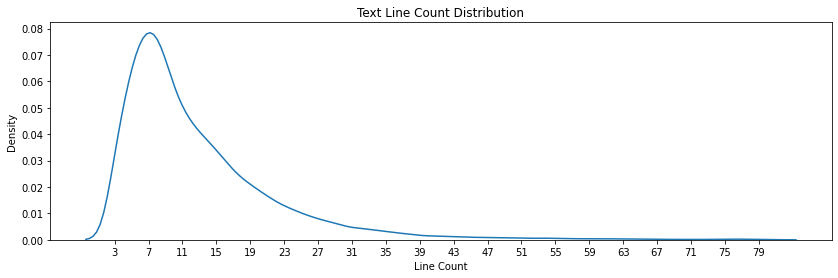

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

line_len_filter = article_dist['Line length'] <= 80

line_min = np.min(article_dist[line_len_filter]['Line length'])
line_max = np.max(article_dist[line_len_filter]['Line length'])
sns.kdeplot(article_dist[line_len_filter]['Line length'])

plt.rcParams["figure.figsize"] = (14,4)
plt.title("Text Line Count Distribution")
plt.xticks(np.arange(line_min, line_max, step=int(line_max // 20)), \
           ["{}".format(int(x)) for x in np.arange(line_min, line_max, step=int(line_max // 20))])
plt.xlabel('Line Count')
plt.show()

15개 이하 문장 수를 가지는 기사에 한하여 토큰 개수를 그래프로 나타낸 것이다.  
180개 이내의 토큰을 가지는 기사들이 대부분이다.

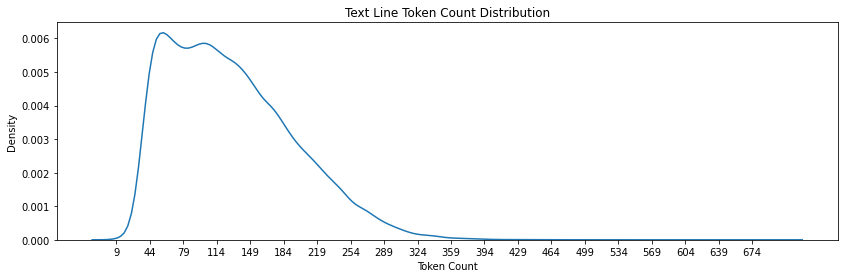

In [20]:
line_len_filter = article_dist['Line length'] <= 15

token_min = np.min(article_dist[line_len_filter]['Token Number'])
token_max = np.max(article_dist[line_len_filter]['Token Number'])

sns.kdeplot(article_dist[line_len_filter]['Token Number'])

plt.rcParams["figure.figsize"] = (14,4)
plt.title("Text Line Token Count Distribution")
plt.xticks(np.arange(token_min, token_max, step=int(token_max // 20)), \
           ["{}".format(int(x)) for x in np.arange(token_min, token_max, step=int(token_max // 20))])
plt.xlabel('Token Count')
plt.show()

다음은 `MAX_LINE`에 따라 기사 본문을 분할하는 내용이다.  
각 기사 본문을 13 문장 이하로 분할하여, 문장 수 분포와 토큰의 개수 분포를 살펴본다.

In [23]:
MAX_LINE = 13

In [32]:
split_by_max_len = lambda sents : [sents[idx*MAX_LINE : idx*MAX_LINE + MAX_LINE] for idx in range(math.ceil(len(sents) / MAX_LINE))]

if __name__ == '__main__':
    
    article_dist = pd.DataFrame(columns=['Title', 'Media', 'Line length', 'Token Number'])
    for idx, media_path in enumerate(iglob(os.path.join(ORIGIN_PATH, '**.csv'), recursive=False)):

        media_name = get_media_name(media_path)
        
        f = open(media_path, 'r', newline="\n", encoding="utf-8")
        rdr = csv.reader(f)
        for [title, contents] in rdr:
            article = Article(title, media_name, contents.split("\t"))
            if len(article.content) < 3: continue # 본문이 3줄 미만인 경우 제외
            
            contents = list(article.readContent())
            for idx, cont in enumerate(split_by_max_len(contents)):
                if len(cont) < 3: continue 
                    
                dist= {'Title' : article.title + "--{}".format(idx), 'Media' : article.media, \
                       'Line length' : len(cont) , 'Token Number' : get_token_count(cont)}
                article_dist = article_dist.append(dist, ignore_index=True)

In [33]:
article_dist['Line length'] = article_dist['Line length'].astype('float64')
article_dist['Token Number'] = article_dist['Token Number'].astype('float64')

In [35]:
display(pd.DataFrame(article_dist))

,Title,Media,Line length,Token Number
0,이태원 클럽발 확진자 계속 증가…각 지자체 추가 행정명령--0,KBS,13.0,160.0
1,이태원 클럽발 확진자 계속 증가…각 지자체 추가 행정명령--1,KBS,7.0,95.0
2,인도 남부서 버스-트럭 충돌로 40여명 사상--0,KBS,5.0,67.0
3,민경욱 “선관위가 ‘여론 조작’ 시도…개표시연 못 믿어”--0,KBS,12.0,231.0
4,미 ‘목 누르기’ 체포 금지 요구 확산…샌디에이고 “즉각 중단”--0,KBS,13.0,233.0
...,...,...,...,...
61455,"아동학대로 한해 30명 넘게 사망 ""범죄를 왜 복지부가 맡나""--1",중앙일보,9.0,136.0
61456,"유치장서 칫솔 삼킨 남성, 이번엔 3m 담 뛰어내려 허리 부상--0",중앙일보,7.0,97.0
61457,"이언주 측 ""배우자가 선거운동 중 멱살잡이 폭행당했다"" 신고--0",중앙일보,6.0,105.0
61458,"홍콩 ""복면금지법"" 부활…""집회서 마스크 쓰면 징역 최대 1년""--0",중앙일보,13.0,242.0


Line Count : 3.0 ~ 13.0


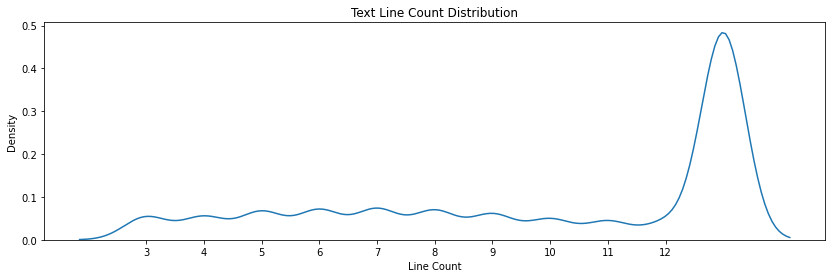

In [34]:
line_min = np.min(article_dist['Line length'])
line_max = np.max(article_dist['Line length'])

print("Line Count : {line_min} ~ {line_max}".format(line_max=line_max, line_min=line_min))
sns.kdeplot(article_dist['Line length'])

plt.rcParams["figure.figsize"] = (14,4)
plt.title("Text Line Count Distribution")
plt.xticks(np.arange(line_min, line_max, step=int(line_max // 13)), \
           ["{}".format(int(x)) for x in np.arange(line_min, line_max, step=int(line_max // 13))])
plt.xlabel('Line Count')
plt.show()

대다수의 토큰의 개수가 300개 이내임을 확인할 수 있다.  
이 이상의 토큰 수를 가지는 기사를 제외할 것이다.

Token Count : 3.0 ~ 906.0


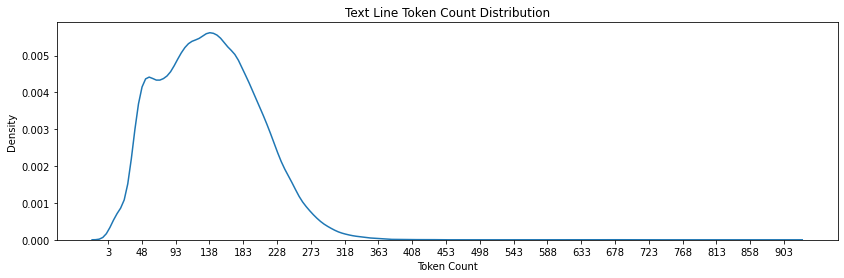

In [36]:
token_min = np.min(article_dist['Token Number'])
token_max = np.max(article_dist['Token Number'])

line_len_filter = article_dist['Line length'] <= 13
print("Token Count : {token_min} ~ {token_max}".format(token_min=token_min, token_max=token_max))

sns.kdeplot(article_dist[line_len_filter]['Token Number'])

plt.rcParams["figure.figsize"] = (14,4)
plt.title("Text Line Token Count Distribution")
plt.xticks(np.arange(token_min, token_max, step=int(token_max // 20)), \
           ["{}".format(int(x)) for x in np.arange(token_min, token_max, step=int(token_max // 20))])
plt.xlabel('Token Count')
plt.show()